### Define imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

### Visualize GSM8k accuracy results

No Gen Accuracies: {'no_gen_qwen3-1.7b_sol': 94.21052631578948, 'no_gen_qwen3-4b_sol': 97.90575916230367, 'no_gen_rlad_sol': 93.54838709677419}
RLAD Gen Accuracies: {'rlad_gen_qwen3-1.7b_sol': 91.39784946236558, 'rlad_gen_qwen3-4b_sol': 97.38219895287958, 'rlad_gen_rlad_sol': 95.16129032258065}
Unique Solvers: ['qwen3-1.7b_sol', 'qwen3-4b_sol', 'rlad_sol']


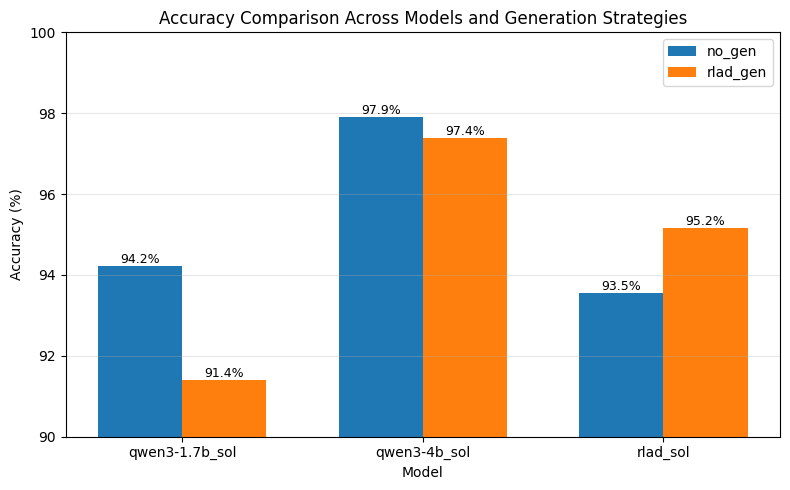

In [2]:
path_to_results = '../runs/gsm8k/summary.json'

with open(path_to_results, 'r') as f:
    results = json.load(f)

complete_results = results['aggregate']
models = list(complete_results.keys())
no_gen_acc = {
    mod: 100 * complete_results[mod]["overall"]["accuracy"] for mod in models if "no_gen" in mod
}
rlad_gen_acc = {
    mod: 100 * complete_results[mod]["overall"]["accuracy"] for mod in models if "rlad_gen" in mod
}
print("No Gen Accuracies:", no_gen_acc)
print("RLAD Gen Accuracies:", rlad_gen_acc)

# Create plots directory if it doesn't exist
os.makedirs("../plots/", exist_ok=True)

# Plot settings
unique_solvers = sorted(list({mod.replace("no_gen_", "") for mod in no_gen_acc.keys()}))

print("Unique Solvers:", unique_solvers)
x = np.arange(len(models) // 2)
width = 0.35


plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, list(no_gen_acc.values()), width, label="no_gen")
bars2 = plt.bar(x + width/2, list(rlad_gen_acc.values()), width, label="rlad_gen")

# Labels & styling
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.title("Accuracy Comparison Across Models and Generation Strategies")
plt.xticks(x, unique_solvers)
plt.ylim(90, 100.0)
plt.legend()

# Annotate bars with percentages
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.002,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )
plt.grid(True, axis="y", alpha=0.3)
plt.savefig("../plots/gsm8k_accuracy_comparison.png", dpi=300)
plt.tight_layout()
plt.show()


### Plot GSM8k statistics on trancated responses

No Gen Truncated: {'no_gen_qwen3-1.7b_sol': 5.0, 'no_gen_qwen3-4b_sol': 4.5, 'no_gen_rlad_sol': 7.0}
RLAD Gen Truncated: {'rlad_gen_qwen3-1.7b_sol': 7.0, 'rlad_gen_qwen3-4b_sol': 4.5, 'rlad_gen_rlad_sol': 7.0}
Unique Solvers: ['qwen3-1.7b_sol', 'qwen3-4b_sol', 'rlad_sol']


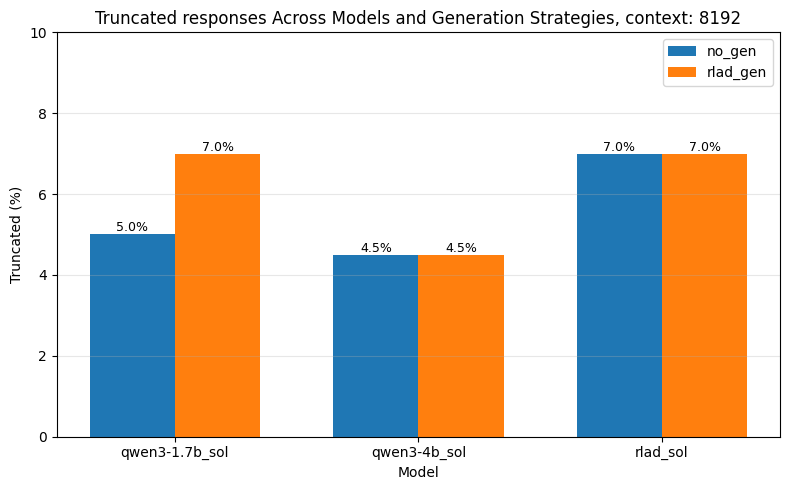

In [3]:
num_examples = results["selected"]["n_total"]

no_gen_trunc = {
    mod: 100 * (complete_results[mod]["overall"]["truncated"] + 2.0) / float(num_examples) for mod in models if "no_gen" in mod
}
rlad_gen_trunc = {
    mod: 100 * (complete_results[mod]["overall"]["truncated"] + 2.0) / float(num_examples) for mod in models if "rlad_gen" in mod
}
print("No Gen Truncated:", no_gen_trunc)
print("RLAD Gen Truncated:", rlad_gen_trunc)

# Create plots directory if it doesn't exist
os.makedirs("../plots/", exist_ok=True)

# Plot settings
unique_solvers = sorted(list({mod.replace("no_gen_", "") for mod in no_gen_trunc.keys()}))

print("Unique Solvers:", unique_solvers)
x = np.arange(len(models) // 2)
width = 0.35


plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, list(no_gen_trunc.values()), width, label="no_gen")
bars2 = plt.bar(x + width/2, list(rlad_gen_trunc.values()), width, label="rlad_gen")
# Labels & styling
plt.ylabel("Truncated (%)")
plt.xlabel("Model")
plt.title(f"Truncated responses Across Models and Generation Strategies, context: {results['gen_cfg']['max_context_tokens']}")
plt.xticks(x, unique_solvers)
plt.ylim(0, 10.0)
plt.legend()

# Annotate bars with percentages
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.002,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )
plt.grid(True, axis="y", alpha=0.3)

plt.savefig("../plots/gsm8k_truncated_comparison.png", dpi=300)
plt.tight_layout()
plt.show()

### Extract results for HMMT25
* pass@k and vote acc

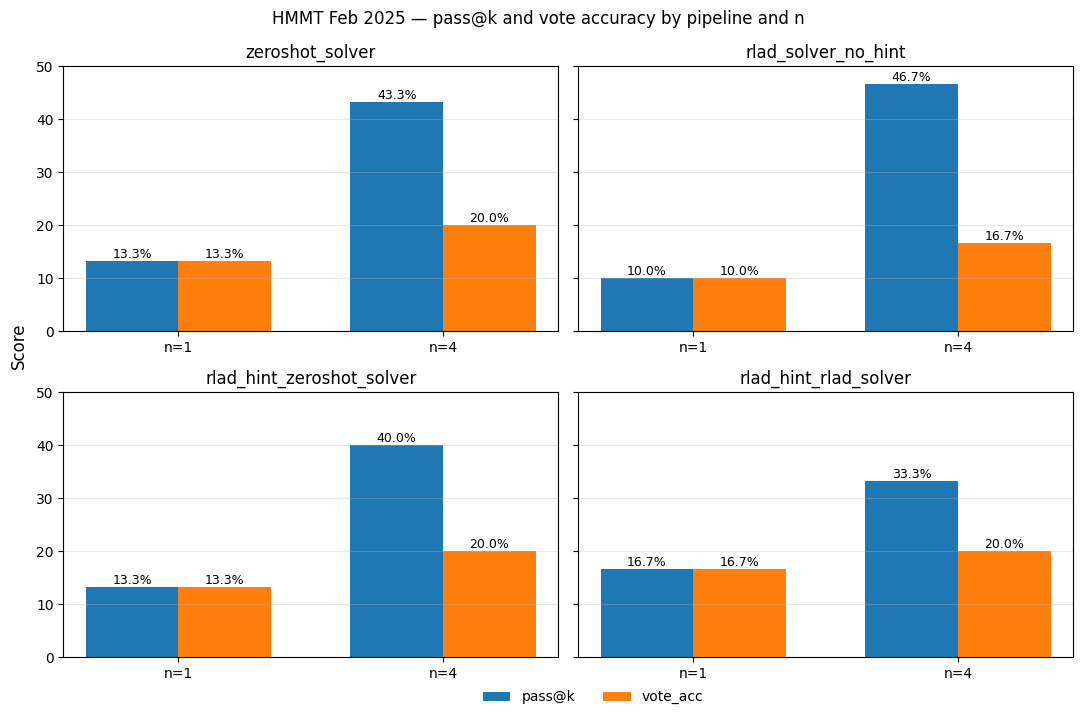

In [4]:
results_path = '../runs/hmmt25/summary.json'

with open(results_path, 'r') as f:
    results = json.load(f)


pipelines = [
    "zeroshot_solver",
    "rlad_solver_no_hint",
    "rlad_hint_zeroshot_solver",
    "rlad_hint_rlad_solver",
]

n_values = [1, 4]
metrics = ["pass_at_k", "vote_acc"]  # plot these side-by-side

fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharey=True)
axes = axes.flatten()

bar_w = 0.35
x = np.arange(len(n_values))

for ax, pipe in zip(axes, pipelines):
    by_n = results["results"][pipe]["all"]["by_n"]

    # Extract metric values for n=1 and n=4 (keys are strings in your dict)
    vals = {m: [by_n[str(n)][m] for n in n_values] for m in metrics}

    ax.bar(x - bar_w/2, 100 * np.array(vals["pass_at_k"]), width=bar_w, label="pass@k")
    ax.bar(x + bar_w/2, 100 * np.array(vals["vote_acc"]),  width=bar_w, label="vote_acc")

    ax.set_title(pipe)
    ax.set_xticks(x)
    ax.set_xticklabels([f"n={n}" for n in n_values])
    ax.set_ylim(0.0, 50.0)
    ax.grid(True, axis="y", alpha=0.3)

    # annotate percentages
    for i, n in enumerate(n_values):
        ax.text(x[i] - bar_w/2, 100 * vals["pass_at_k"][i] + 0.02, f"{100 * vals['pass_at_k'][i]:.1f}%",
                ha="center", va="bottom", fontsize=9)
        ax.text(x[i] + bar_w/2, 100 * vals["vote_acc"][i] + 0.02, f"{100 * vals['vote_acc'][i]:.1f}%",
                ha="center", va="bottom", fontsize=9)

# Common labels/legend
fig.suptitle("HMMT Feb 2025 — pass@k and vote accuracy by pipeline and n", y=0.98)
# fig.supxlabel("Number of samples (n)")
fig.supylabel("Score")

# Put one legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, frameon=False, bbox_to_anchor=(0.55, -0.03))

plt.tight_layout()
plt.savefig("../plots/hmmt25_pipeline_comparison.png", dpi=300)
plt.show()

### HMMT25 avg and best for 4x1

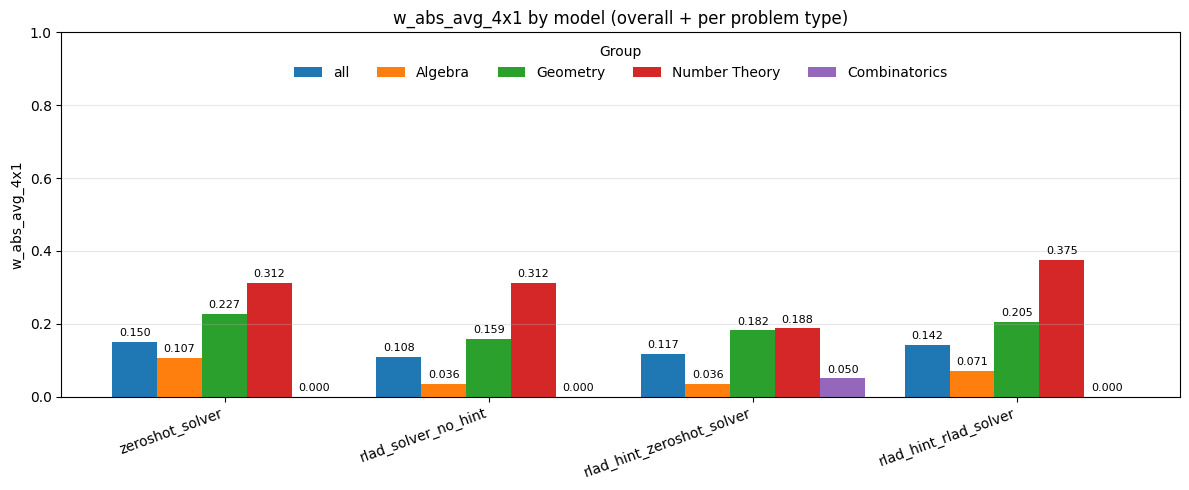

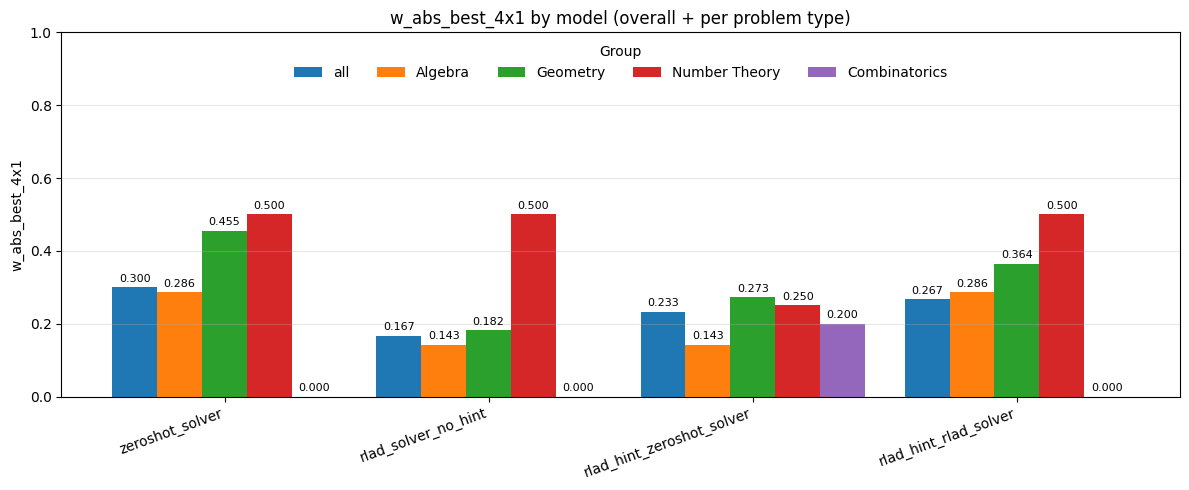

In [5]:
models = list(results["results"].keys())
# Collect problem types (assumes consistent across pipelines)
problem_types = ["Algebra", "Geometry", "Number Theory", "Combinatorics"]
groups = ["all"] + problem_types  # overall + per type

def extract_metric(model_name: str, group_name: str, metric_key: str) -> float:
    if group_name == "all":
        return results["results"][model_name]["all"][metric_key]
    return results["results"][model_name]["by_problem_type"][group_name][metric_key]

def plot_grouped(metric_key: str, title: str):
    # Data matrix: rows=models, cols=groups
    data = np.array([
        [extract_metric(m, g, metric_key) for g in groups]
        for m in models
    ])

    x = np.arange(len(models))
    n_groups = len(groups)

    # Bar geometry: one "cluster" per model, many bars inside
    total_width = 0.85
    bar_w = total_width / n_groups
    offsets = (np.arange(n_groups) - (n_groups - 1) / 2) * bar_w

    plt.figure(figsize=(12, 5))
    for j, g in enumerate(groups):
        plt.bar(x + offsets[j], data[:, j], width=bar_w, label=g)

        # annotate values
        for i in range(len(models)):
            v = data[i, j]
            plt.text(x[i] + offsets[j], v + 0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=8)

    plt.title(title)
    plt.ylabel(metric_key)
    plt.xticks(x, models, rotation=20, ha="right")
    plt.ylim(0.0, 1.0)
    plt.grid(True, axis="y", alpha=0.3)
    plt.legend(title="Group", loc="upper center", ncol=min(5, n_groups), frameon=False)
    plt.tight_layout()
    plt.savefig(f"../plots/hmmt25_{metric_key}_by_model.png", dpi=300)
    plt.show()

# Plot 1: avg
plot_grouped(
    metric_key="w_abs_avg_4x1",
    title="w_abs_avg_4x1 by model (overall + per problem type)"
)

# Plot 2: best
plot_grouped(
    metric_key="w_abs_best_4x1",
    title="w_abs_best_4x1 by model (overall + per problem type)"
)